# Forecasting ABC

### Libraries

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import sklearn
import random as rnd
import math
from scipy import stats
from scipy.stats import norm
from datetime import date, datetime, timedelta, time


# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Notes

predicting the adj_close price  
- the stock value by end of day after considering dividend and historical price -

In [2]:
file_name = r"C:\Users\Kye Manning-Lees\Capstone\ABC.csv"

In [3]:
df = pd.read_csv(file_name)
df.head()

,Unnamed: 0,symbol,date,open,high,low,close,volume,adj_close,prev_day_diff,50_day_moving_avg,10_day_volatility,s&p_index_open,s&p_index_high,s&p_index_low,s&p_index_close,s&p_index_volume,s&p_index_adj_close
0,0,ABC,1995-04-04,0.005950,0.005949,0.005759,0.005980,40387200,0.000983,0.000000,2.545774,0.000000,501.850006,505.260010,501.850006,505.239990,330580000.0,505.239990
1,1,ABC,1995-04-05,0.005887,0.005949,0.005823,0.005759,12236800,0.000947,-0.094284,2.498632,0.047142,505.269989,505.570007,503.170013,505.570007,315170000.0,505.570007
2,2,ABC,1995-04-06,0.005760,0.005886,0.005823,0.005854,3776000,0.000962,0.040405,2.496386,0.004491,505.630005,507.100006,505.000000,506.079987,320460000.0,506.079987
3,3,ABC,1995-04-07,0.005887,0.005824,0.005823,0.005759,1920800,0.000947,-0.040405,2.485162,0.033672,506.130005,507.190002,503.589996,506.420013,314760000.0,506.420013
4,4,ABC,1995-04-10,0.005760,0.005824,0.005823,0.005822,2047200,0.000957,0.026939,2.483815,0.005386,506.299988,507.010010,504.609985,507.010010,260980000.0,507.010010


### Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5269 entries, 0 to 5268
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           5269 non-null   int64  
 1   symbol               5269 non-null   object 
 2   date                 5269 non-null   object 
 3   open                 5269 non-null   float64
 4   high                 5269 non-null   float64
 5   low                  5269 non-null   float64
 6   close                5269 non-null   float64
 7   volume               5269 non-null   int64  
 8   adj_close            5269 non-null   float64
 9   prev_day_diff        5269 non-null   float64
 10  50_day_moving_avg    5269 non-null   float64
 11  10_day_volatility    5269 non-null   float64
 12  s&p_index_open       5268 non-null   float64
 13  s&p_index_high       5268 non-null   float64
 14  s&p_index_low        5268 non-null   float64
 15  s&p_index_close      5268 non-null   f

In [5]:
df.describe(include='all')

,Unnamed: 0,symbol,date,open,high,low,close,volume,adj_close,prev_day_diff,50_day_moving_avg,10_day_volatility,s&p_index_open,s&p_index_high,s&p_index_low,s&p_index_close,s&p_index_volume,s&p_index_adj_close
count,5269.000000,5269,5269,5269.000000,5269.000000,5269.000000,5269.000000,5.269000e+03,5269.000000,5269.000000,5269.000000,5269.000000,5268.000000,5268.000000,5268.000000,5268.000000,5.268000e+03,5268.000000
unique,NaN,1,5269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,ABC,2015-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,5269,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2634.000000,NaN,NaN,0.012786,0.012794,0.012778,0.012787,2.880934e+06,0.009620,0.016184,24.514627,0.449817,1242.577821,1250.606219,1234.024783,1242.861877,2.429680e+09,1242.861877
std,1521.173615,NaN,NaN,0.005129,0.005110,0.005150,0.005128,2.832777e+06,0.009862,0.427346,25.176447,0.632938,361.128300,362.082616,359.975934,361.079850,1.728070e+09,361.079850
min,0.000000,NaN,NaN,0.002785,0.002990,0.002815,0.002974,3.200000e+03,0.000832,-4.781252,2.379288,0.000000,501.850006,505.260010,501.190002,504.920013,1.499000e+07,504.920013
25%,1317.000000,NaN,NaN,0.009255,0.009268,0.009270,0.009262,1.318600e+06,0.003032,-0.123282,7.380875,0.107772,1028.059967,1036.267548,1020.202499,1028.240020,9.786500e+08,1028.240020
50%,2634.000000,NaN,NaN,0.012027,0.012070,0.011991,0.012024,2.318800e+06,0.006044,0.006497,15.407690,0.260194,1218.809998,1225.659973,1211.294983,1218.799988,1.971870e+09,1218.799988
75%,3951.000000,NaN,NaN,0.015445,0.015480,0.015468,0.015459,3.640400e+06,0.011745,0.165242,29.457498,0.546991,1409.437531,1417.957519,1401.582459,1409.487457,3.676890e+09,1409.487457


### Data Exploration

### Assumptions
a change in moving average would indicate a change in future price (swing trading  

#### Open/High/Low/Close
represents the price fluctuations across a trading day  
* A change in price from open to close reflects the daily trend. 
    * a fall from open to close reflect market reduced value and demand
    * a rise from open to close reflects market increased value and demand
* High and Low provide a boundary for the daily price fluctuations. 
    * greater boundary represents higher fluctuations and market instability
    * smaller boundary represents lower fluctuations and market confidence
  
#### Volume
represents the quantity of depth  
* volume can help confirm price trends that have already formed or serve as a warning for a potential trend reversal
* volume can indicate the strength behind a price move. 
    * perhaps a strong volume for one side reflects market confidence in future growth?
* increasing trading volume could indicate a favourable trend in price, whilst falling volume reflects lossing interest. 
* volume is expected to increase/decrease with price movement. 

#### Adjusted Close
Representation of the stock value
would be good to deteremine the calculations for this

#### Previous Day Difference
represents the change from today and yesterday
determine the calulcations for this

#### 50 Day Moving Average
Representation of stock trend for past 50 days. 
refine calculations for this
* Common to use these as boundary to identify swings in prices
    * Opportunity to add moving averages for different times as well as for open/high/low/close and adjusted. 

#### 10 Day Volatility
determine calulations for this

#### S&P Index 
Representation for total market movements
* Significant market movements represent external factors to demand and may influence ABC price
* Insightful benchmarkt to compare performance 
* considering the ABC stock appears low market cap, it would not influence the S&P, but could be influenced by it. Not in the top 500 I would assume though, making it less susceptible to ETF's. 


#### Adjusted Closing Price over time

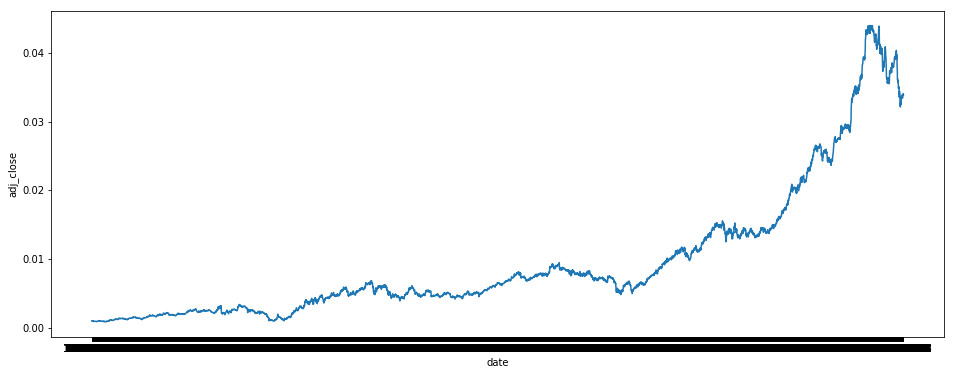

In [13]:
plt.figure(figsize=(16, 6))
sns.lineplot(data=df, x="date", y="adj_close")

# EDA on Market Sample (2014-2016)

In [6]:
df_2014 = df.iloc[4720:,:]
df_2014.head()

,Unnamed: 0,symbol,date,open,high,low,close,volume,adj_close,prev_day_diff,50_day_moving_avg,10_day_volatility,s&p_index_open,s&p_index_high,s&p_index_low,s&p_index_close,s&p_index_volume,s&p_index_adj_close
4720,4720,ABC,2014-01-02,0.017752,0.017592,0.017782,0.017692,1148400,0.026218,-0.408008,66.527284,0.137943,1845.859985,1845.859985,1827.739990,1831.979980,3.080600e+09,1831.979980
4721,4721,ABC,2014-01-03,0.017696,0.017587,0.017867,0.017704,1101300,0.026237,0.048575,66.651606,0.121426,1833.209961,1838.239990,1829.130005,1831.369995,2.774270e+09,1831.369995
4722,4722,ABC,2014-01-06,0.017810,0.017669,0.017749,0.017641,1301400,0.026143,-0.242863,66.769715,0.370118,1832.310059,1837.160034,1823.729980,1826.770020,3.294850e+09,1826.770020
4723,4723,ABC,2014-01-07,0.017679,0.017765,0.017869,0.017833,1531600,0.026428,0.738299,66.886907,0.306980,1828.709961,1840.099976,1828.709961,1837.880005,3.511750e+09,1837.880005
4724,4724,ABC,2014-01-08,0.017808,0.017887,0.017987,0.018008,2084000,0.026687,0.670304,67.005888,0.869453,1837.900024,1840.020020,1831.400024,1837.489990,3.652140e+09,1837.489990


### S&P Adjusted Close 

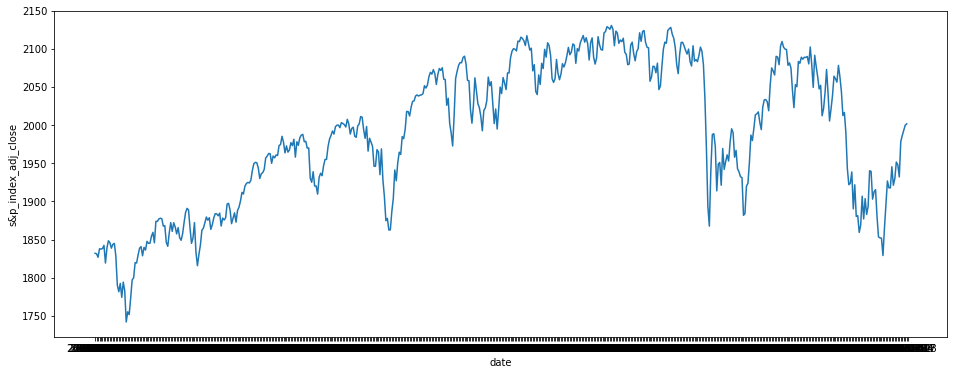

In [16]:
plt.figure(figsize=(16, 6))
sns.lineplot(data=df_2014, x="date", y="s&p_index_adj_close")

### ABC Adjusted Close

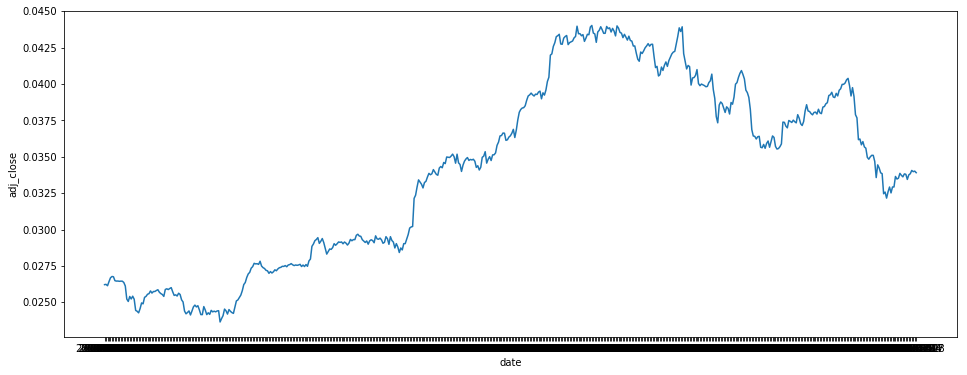

In [14]:
plt.figure(figsize=(16, 6))
sns.lineplot(data=df_2014, x="date", y="adj_close")

### Volume 

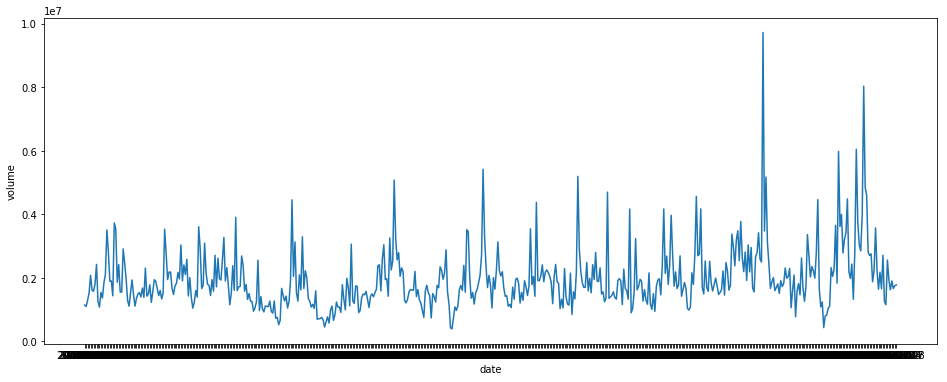

In [12]:
plt.figure(figsize=(16, 6))
sns.lineplot(data=df_2014, x="date", y="volume")

### Prev Day Diff

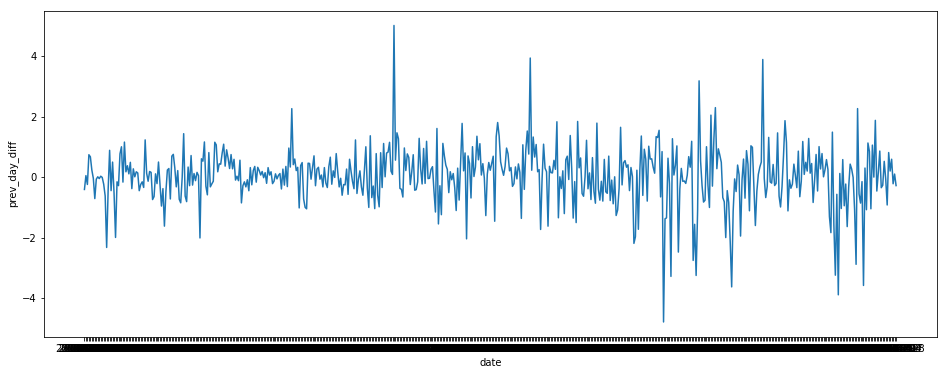

In [17]:
plt.figure(figsize=(16, 6))
sns.lineplot(data=df_2014, x="date", y="prev_day_diff")

### 50 Day Moving Average

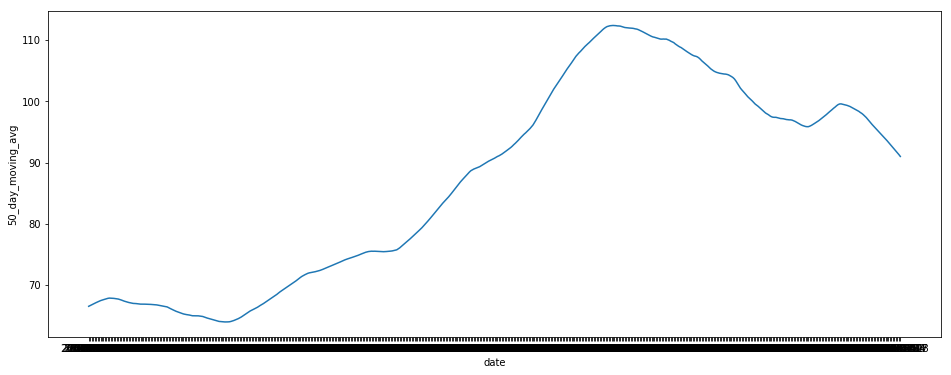

In [18]:
plt.figure(figsize=(16, 6))
sns.lineplot(data=df_2014, x="date", y="50_day_moving_avg")

### 10 Day Volatility

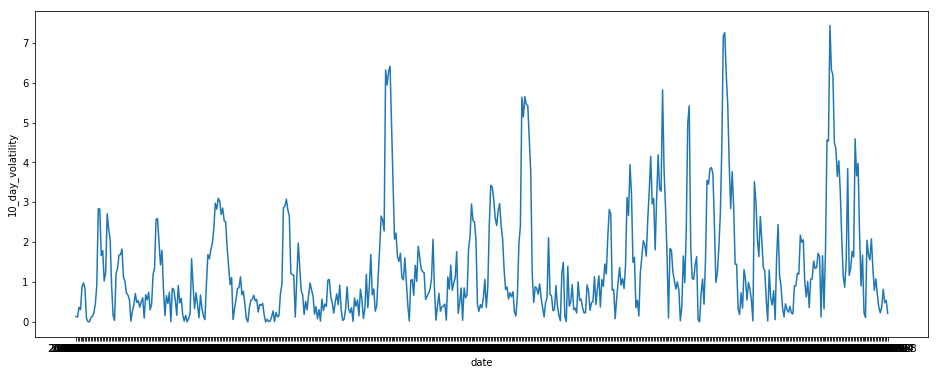

In [19]:
plt.figure(figsize=(16, 6))
sns.lineplot(data=df_2014, x="date", y="10_day_volatility")

## Correlation

C:\Users\Kye Manning-Lees\.conda\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


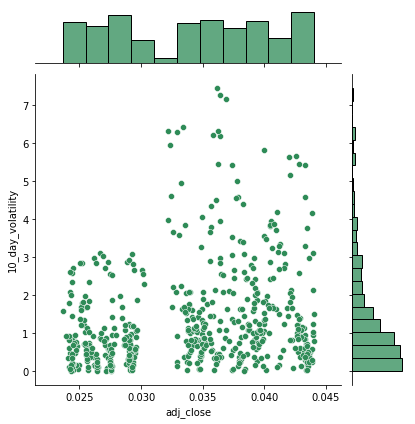

In [25]:
sns.jointplot('adj_close', '10_day_volatility', df_2014, kind='scatter', color='seagreen')

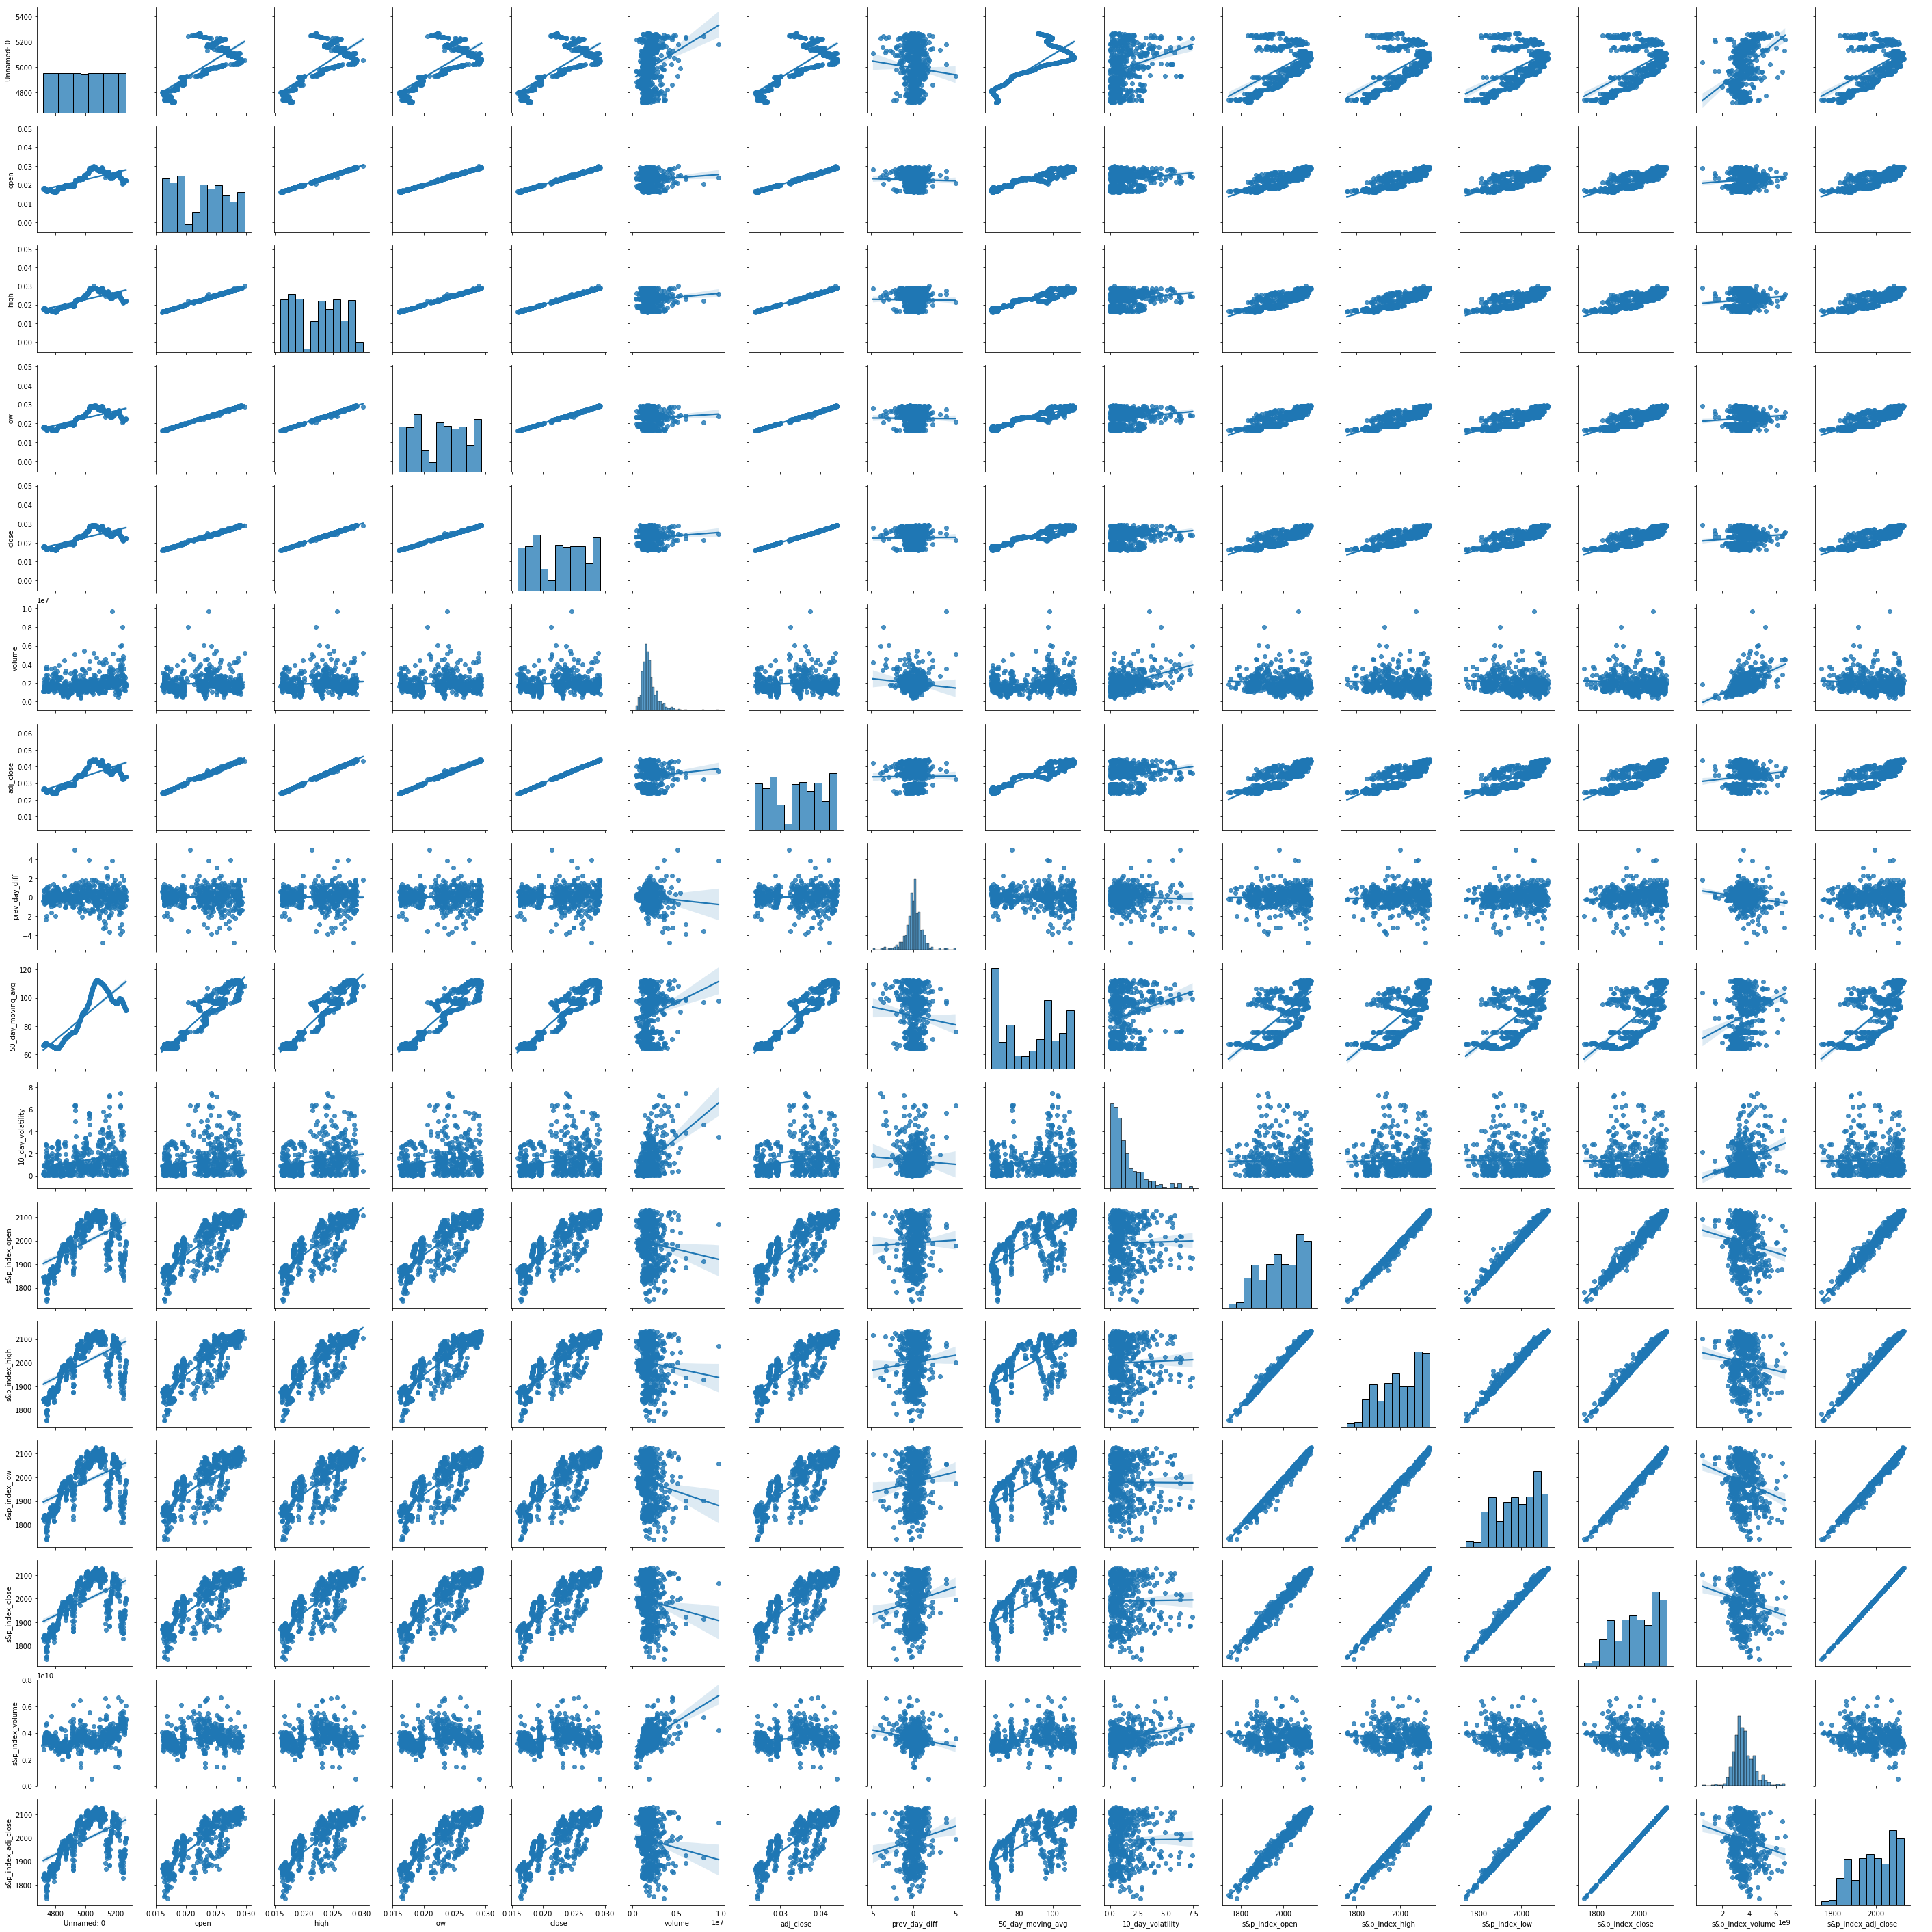

In [36]:
sns.pairplot(df_2014, kind='reg')

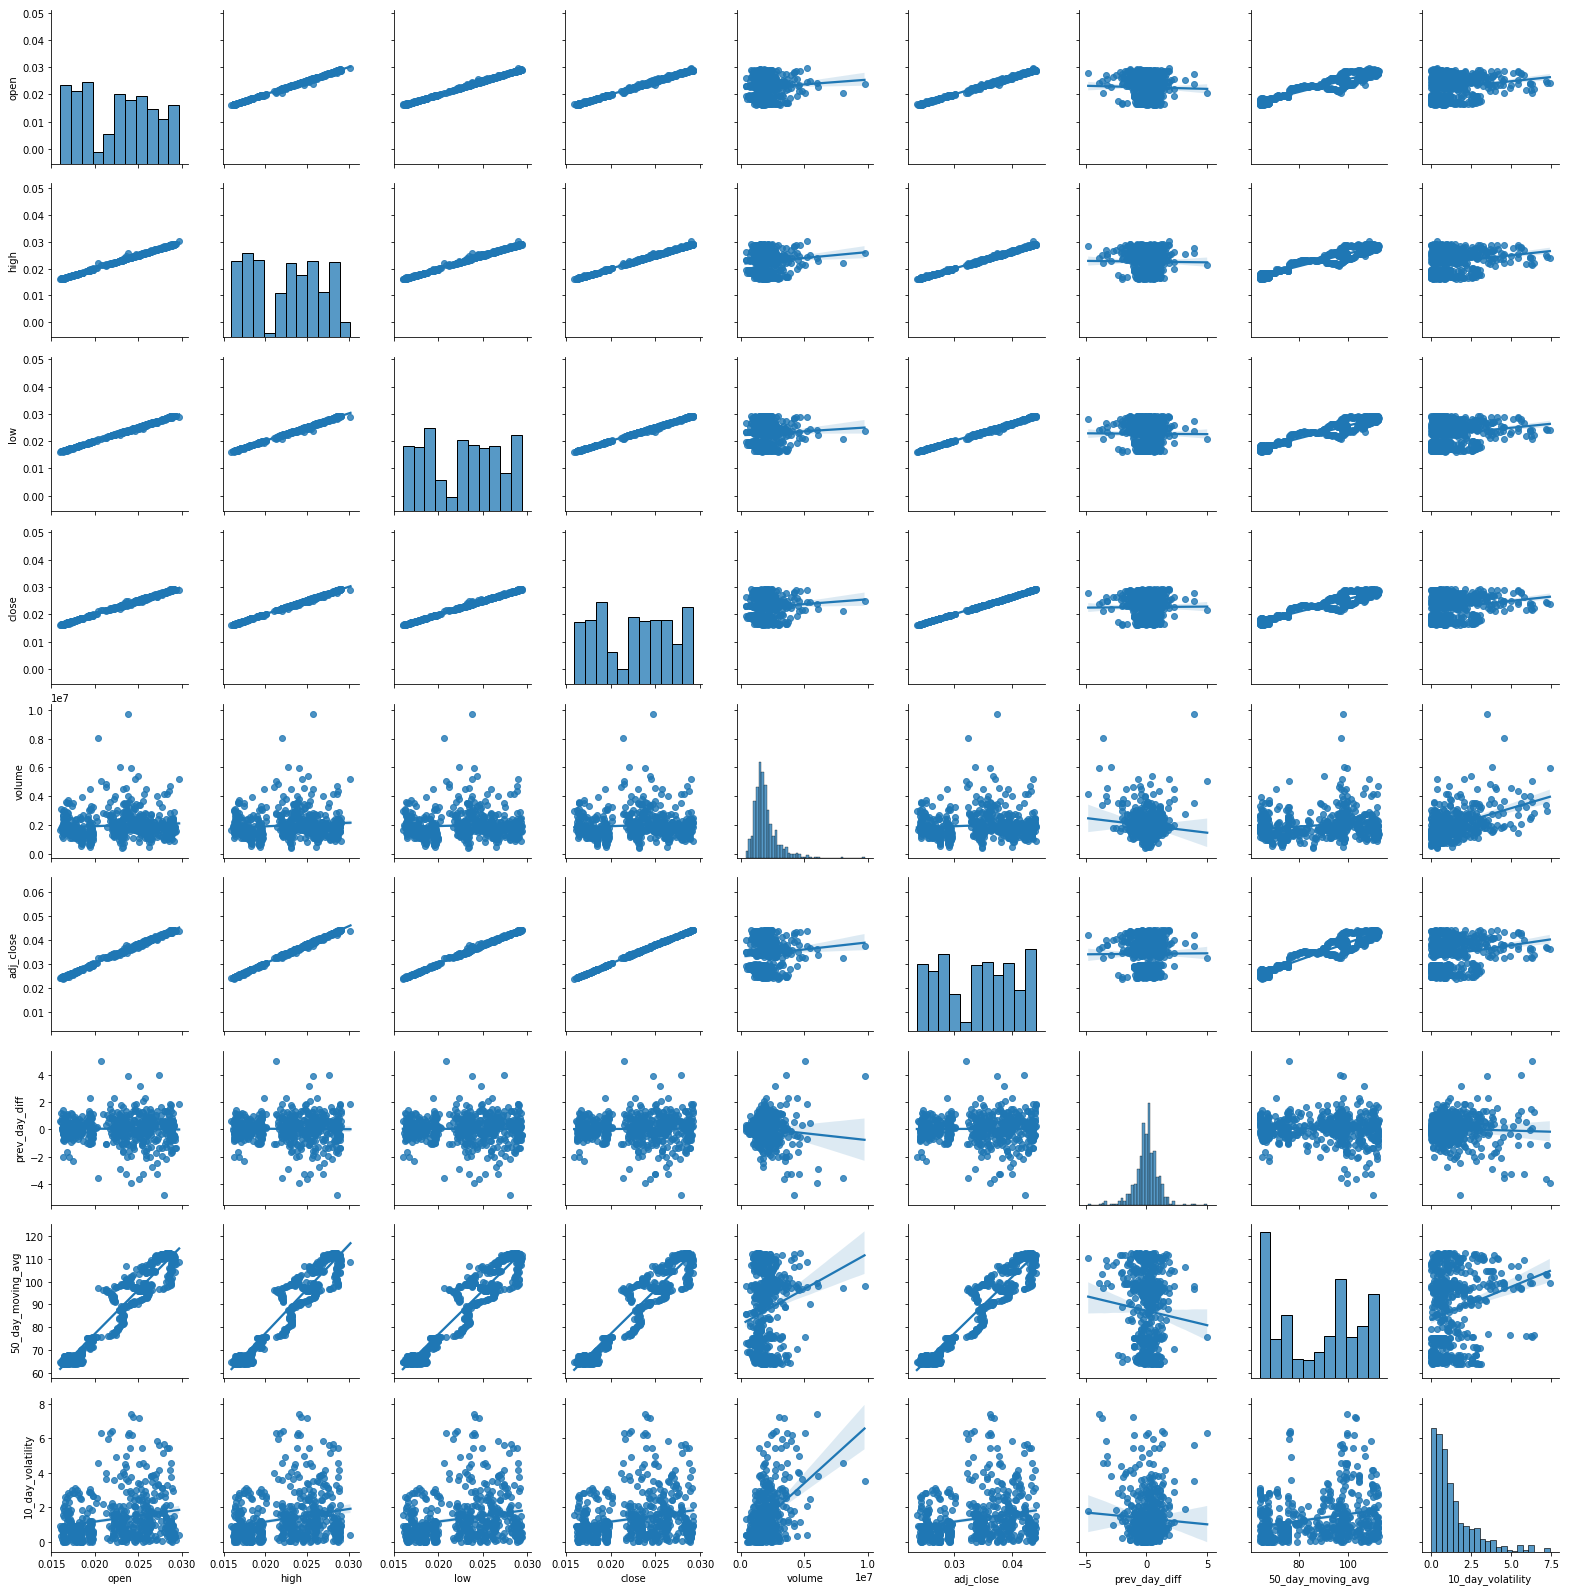

In [46]:
sns.pairplot(df_2014[['open', 'high', 'low', 'close', 'volume', 'adj_close', 'prev_day_diff', '50_day_moving_avg', '10_day_volatility']], kind='reg')

No outstanding correlations between features

In [47]:
# var = 'firstDelivery'
# data = pd.concat([df['numBoxes'], df[var]], axis=1)
# f, ax = plt.subplots(figsize=(16, 8))
# fig = sns.boxplot(x=var, y="numBoxes", data=data)
# fig.axis(ymin=0, ymax=100);
# plt.xticks(rotation=90);

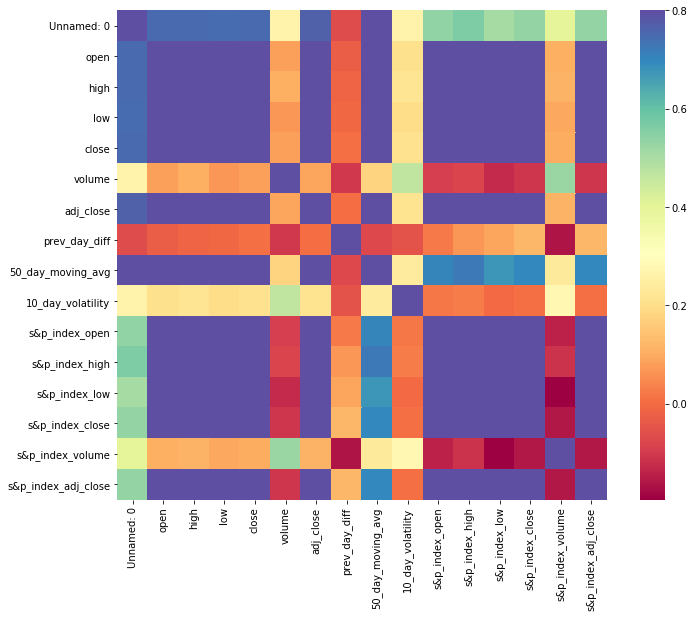

In [54]:
#correlation matrix
corrmat = df_2014.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, cmap="Spectral");

In [51]:
df_lt = corrmat.where(np.tril(np.ones(corrmat.shape)).astype(np.bool))

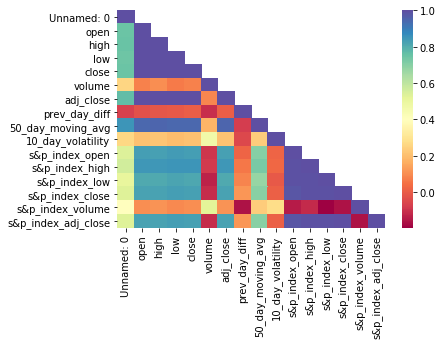

In [52]:
hmap=sns.heatmap(df_lt,cmap="Spectral")

### Correlation Insights:

Corralated:
* volume and the S&P price
* prev day diff and S&P volume and 50 day moving average
* 50 day moving average and the S&P price
* S&P volume and adjusted close

No correlation:
* 10 day volatility has very little correlation with other features
* prev day diff little correlation

In [55]:
#VWAP = price x Volume / Volume

df_2014.head()

,Unnamed: 0,symbol,date,open,high,low,close,volume,adj_close,prev_day_diff,50_day_moving_avg,10_day_volatility,s&p_index_open,s&p_index_high,s&p_index_low,s&p_index_close,s&p_index_volume,s&p_index_adj_close
4720,4720,ABC,2014-01-02,0.017752,0.017592,0.017782,0.017692,1148400,0.026218,-0.408008,66.527284,0.137943,1845.859985,1845.859985,1827.739990,1831.979980,3.080600e+09,1831.979980
4721,4721,ABC,2014-01-03,0.017696,0.017587,0.017867,0.017704,1101300,0.026237,0.048575,66.651606,0.121426,1833.209961,1838.239990,1829.130005,1831.369995,2.774270e+09,1831.369995
4722,4722,ABC,2014-01-06,0.017810,0.017669,0.017749,0.017641,1301400,0.026143,-0.242863,66.769715,0.370118,1832.310059,1837.160034,1823.729980,1826.770020,3.294850e+09,1826.770020
4723,4723,ABC,2014-01-07,0.017679,0.017765,0.017869,0.017833,1531600,0.026428,0.738299,66.886907,0.306980,1828.709961,1840.099976,1828.709961,1837.880005,3.511750e+09,1837.880005
4724,4724,ABC,2014-01-08,0.017808,0.017887,0.017987,0.018008,2084000,0.026687,0.670304,67.005888,0.869453,1837.900024,1840.020020,1831.400024,1837.489990,3.652140e+09,1837.489990


In [58]:
df_2014['VWAP'] = (df_2014['adj_close'] * df_2014['volume']) / df_2014['volume']
df_2014.head()

C:\Users\Kye Manning-Lees\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Unnamed: 0,symbol,date,open,high,low,close,volume,adj_close,prev_day_diff,50_day_moving_avg,10_day_volatility,s&p_index_open,s&p_index_high,s&p_index_low,s&p_index_close,s&p_index_volume,s&p_index_adj_close,VWAP
4720,4720,ABC,2014-01-02,0.017752,0.017592,0.017782,0.017692,1148400,0.026218,-0.408008,66.527284,0.137943,1845.859985,1845.859985,1827.739990,1831.979980,3.080600e+09,1831.979980,0.026218
4721,4721,ABC,2014-01-03,0.017696,0.017587,0.017867,0.017704,1101300,0.026237,0.048575,66.651606,0.121426,1833.209961,1838.239990,1829.130005,1831.369995,2.774270e+09,1831.369995,0.026237
4722,4722,ABC,2014-01-06,0.017810,0.017669,0.017749,0.017641,1301400,0.026143,-0.242863,66.769715,0.370118,1832.310059,1837.160034,1823.729980,1826.770020,3.294850e+09,1826.770020,0.026143
4723,4723,ABC,2014-01-07,0.017679,0.017765,0.017869,0.017833,1531600,0.026428,0.738299,66.886907,0.306980,1828.709961,1840.099976,1828.709961,1837.880005,3.511750e+09,1837.880005,0.026428
4724,4724,ABC,2014-01-08,0.017808,0.017887,0.017987,0.018008,2084000,0.026687,0.670304,67.005888,0.869453,1837.900024,1840.020020,1831.400024,1837.489990,3.652140e+09,1837.489990,0.026687


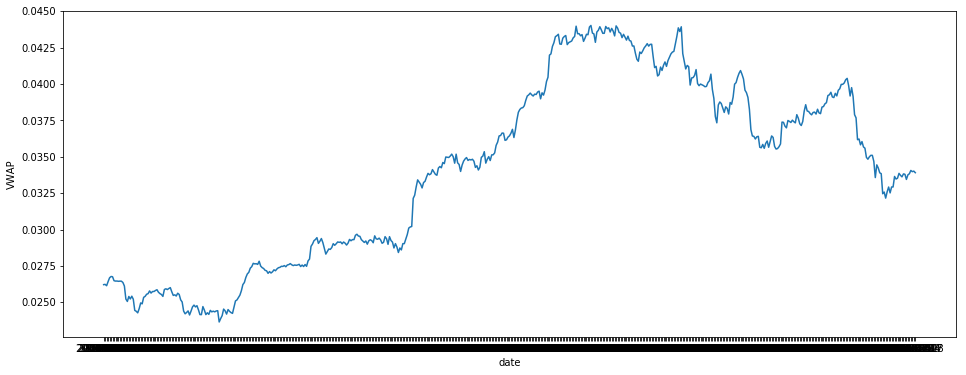

In [59]:
plt.figure(figsize=(16, 6))
sns.lineplot(data=df_2014, x="date", y="VWAP")

In [60]:
#twap = average of n days price / n
#number of days = rows of df
len(df_2014.index)

549

In [66]:
# N = len(df_2014.index)
# avgPrice = sum(df_2014['adj_close'])/N
# df_2014['TWAP'] = (avPrice)/N

In [ ]:
# risk
# how to develop for our next step

In [12]:
# df_2014['volume_MA'] = df.iloc[;,'date']
df_2014.head()

,Unnamed: 0,symbol,date,open,high,low,close,volume,adj_close,prev_day_diff,50_day_moving_avg,10_day_volatility,s&p_index_open,s&p_index_high,s&p_index_low,s&p_index_close,s&p_index_volume,s&p_index_adj_close
4720,4720,ABC,2014-01-02,0.017752,0.017592,0.017782,0.017692,1148400,0.026218,-0.408008,66.527284,0.137943,1845.859985,1845.859985,1827.739990,1831.979980,3.080600e+09,1831.979980
4721,4721,ABC,2014-01-03,0.017696,0.017587,0.017867,0.017704,1101300,0.026237,0.048575,66.651606,0.121426,1833.209961,1838.239990,1829.130005,1831.369995,2.774270e+09,1831.369995
4722,4722,ABC,2014-01-06,0.017810,0.017669,0.017749,0.017641,1301400,0.026143,-0.242863,66.769715,0.370118,1832.310059,1837.160034,1823.729980,1826.770020,3.294850e+09,1826.770020
4723,4723,ABC,2014-01-07,0.017679,0.017765,0.017869,0.017833,1531600,0.026428,0.738299,66.886907,0.306980,1828.709961,1840.099976,1828.709961,1837.880005,3.511750e+09,1837.880005
4724,4724,ABC,2014-01-08,0.017808,0.017887,0.017987,0.018008,2084000,0.026687,0.670304,67.005888,0.869453,1837.900024,1840.020020,1831.400024,1837.489990,3.652140e+09,1837.489990


In [25]:
df_2014['volume_MA'] = df_2014.iloc[:,7].rolling(window=15).mean()
df_2014.head()

C:\Users\Kye Manning-Lees\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Unnamed: 0,symbol,date,open,high,low,close,volume,adj_close,prev_day_diff,50_day_moving_avg,10_day_volatility,s&p_index_open,s&p_index_high,s&p_index_low,s&p_index_close,s&p_index_volume,s&p_index_adj_close,volume_MA
4720,4720,ABC,2014-01-02,0.017752,0.017592,0.017782,0.017692,1148400,0.026218,-0.408008,66.527284,0.137943,1845.859985,1845.859985,1827.739990,1831.979980,3.080600e+09,1831.979980,NaN
4721,4721,ABC,2014-01-03,0.017696,0.017587,0.017867,0.017704,1101300,0.026237,0.048575,66.651606,0.121426,1833.209961,1838.239990,1829.130005,1831.369995,2.774270e+09,1831.369995,NaN
4722,4722,ABC,2014-01-06,0.017810,0.017669,0.017749,0.017641,1301400,0.026143,-0.242863,66.769715,0.370118,1832.310059,1837.160034,1823.729980,1826.770020,3.294850e+09,1826.770020,NaN
4723,4723,ABC,2014-01-07,0.017679,0.017765,0.017869,0.017833,1531600,0.026428,0.738299,66.886907,0.306980,1828.709961,1840.099976,1828.709961,1837.880005,3.511750e+09,1837.880005,NaN
4724,4724,ABC,2014-01-08,0.017808,0.017887,0.017987,0.018008,2084000,0.026687,0.670304,67.005888,0.869453,1837.900024,1840.020020,1831.400024,1837.489990,3.652140e+09,1837.489990,NaN


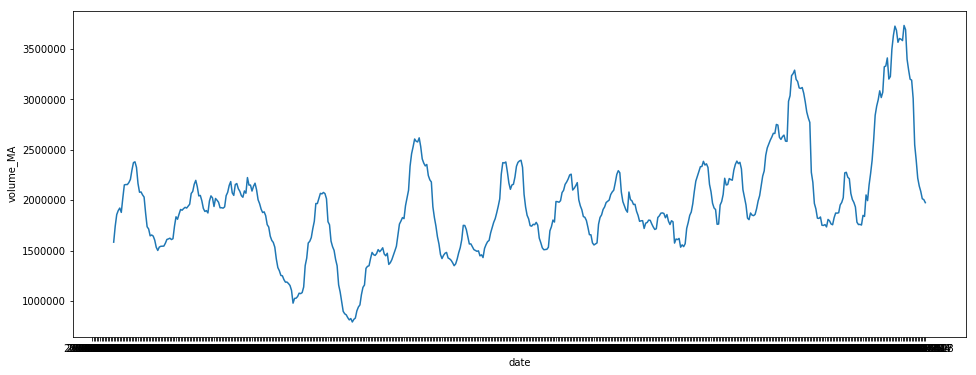

In [26]:
plt.figure(figsize=(16, 6))
sns.lineplot(data=df_2014, x="date", y="volume_MA")

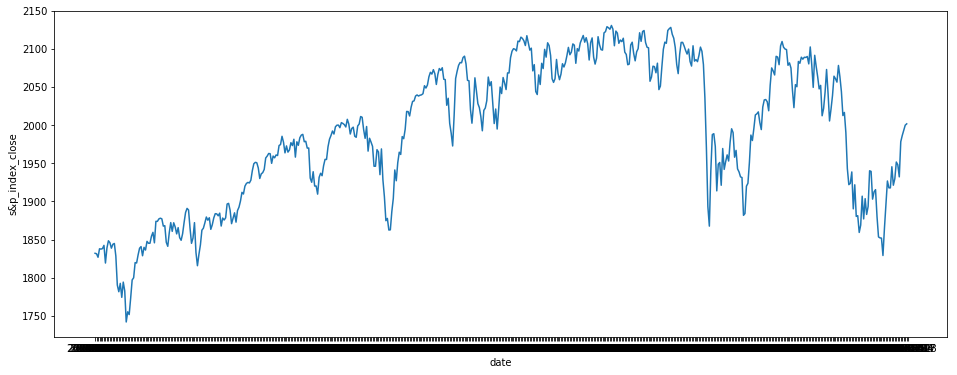

In [31]:
plt.figure(figsize=(16, 6))
sns.lineplot(data=df_2014, x="date", y="s&p_index_close")

In [38]:
df_norm = df_2014[['date', 'volume_MA', 's&p_index_close']]
df_norm

,date,volume_MA,s&p_index_close
4720,2014-01-02,NaN,1831.979980
4721,2014-01-03,NaN,1831.369995
4722,2014-01-06,NaN,1826.770020
4723,2014-01-07,NaN,1837.880005
4724,2014-01-08,NaN,1837.489990
...,...,...,...
5264,2016-03-02,2.142660e+06,1986.449951
5265,2016-03-03,2.089247e+06,1993.400024
5266,2016-03-04,2.016467e+06,1999.989990
5267,2016-03-07,2.008060e+06,2001.760010


In [39]:
df_norm['volume_MA'] = (df_norm['volume_MA']-df_norm['volume_MA'].min())/(df_norm['volume_MA'].max()-df_norm['volume_MA'].min())

C:\Users\Kye Manning-Lees\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [40]:
df_norm

,date,volume_MA,s&p_index_close
4720,2014-01-02,NaN,1831.979980
4721,2014-01-03,NaN,1831.369995
4722,2014-01-06,NaN,1826.770020
4723,2014-01-07,NaN,1837.880005
4724,2014-01-08,NaN,1837.489990
...,...,...,...
5264,2016-03-02,0.458518,1986.449951
5265,2016-03-03,0.440336,1993.400024
5266,2016-03-04,0.415561,1999.989990
5267,2016-03-07,0.412699,2001.760010


In [41]:
df_norm['s&p_index_close'] = (df_norm['s&p_index_close']-df_norm['s&p_index_close'].min())/(df_norm['s&p_index_close'].max()-df_norm['s&p_index_close'].min())
df_norm

C:\Users\Kye Manning-Lees\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,date,volume_MA,s&p_index_close
4720,2014-01-02,NaN,0.231635
4721,2014-01-03,NaN,0.230067
4722,2014-01-06,NaN,0.218240
4723,2014-01-07,NaN,0.246805
4724,2014-01-08,NaN,0.245802
...,...,...,...
5264,2016-03-02,0.458518,0.628802
5265,2016-03-03,0.440336,0.646672
5266,2016-03-04,0.415561,0.663615
5267,2016-03-07,0.412699,0.668166


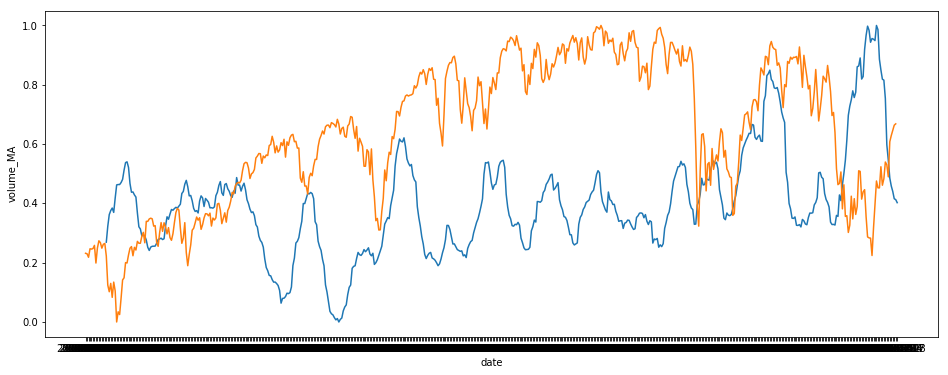

In [42]:
plt.figure(figsize=(16, 6))
sns.lineplot(data=df_norm, x="date", y="volume_MA")
sns.lineplot(data=df_norm, x="date", y="s&p_index_close")

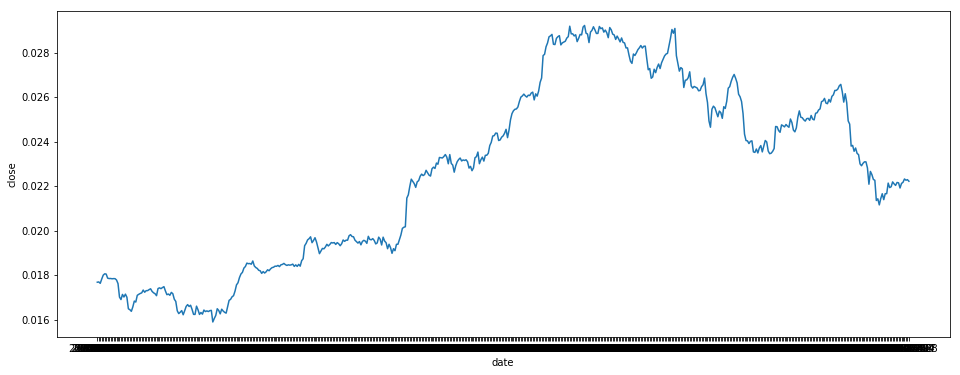

In [28]:
plt.figure(figsize=(16, 6))
sns.lineplot(data=df_2014, x="date", y="close")

#### Volume and Price

* Price and Volume increase:
    * strong confidence
* Price increase, Volume decrease:
    * potential downside
* Price decrease volume increase:
    * strong bear sentiment
* Price and volume decrease:
    * potential upside
    
lets focus on strong indicators  
is there correlation between increase of volume leading to increase in price?

In [29]:
# doesn greater volatility in volume suggest strength in price direction?

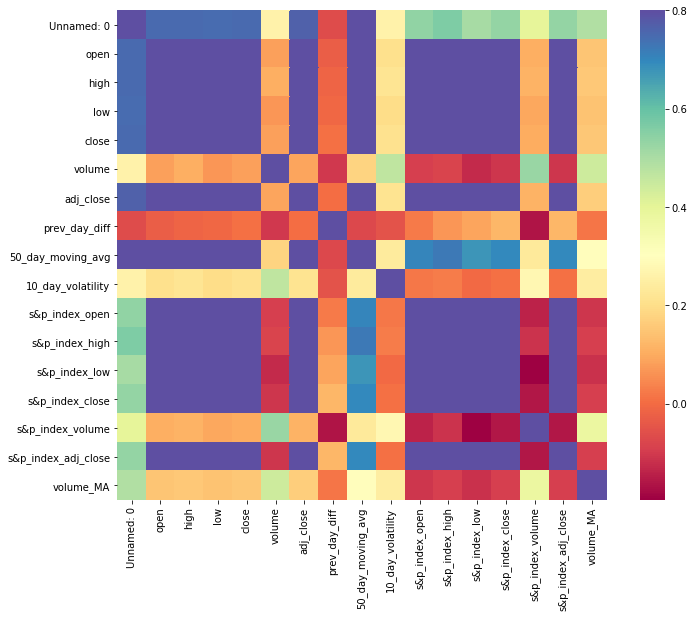

In [46]:
#correlation matrix
corrmat = df_2014.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, cmap="Spectral");

In [43]:
# looks like volatility in volume is attributed greater to index movements then price points. 

In [44]:
# opportunity to find momentum from volume

In [1]:
# residual and relationship 
# look for other data that can help with developing features


In [3]:
# first start deploying the data into the model
# iteratively build complexity over this pipeline and lifecycle

In [ ]:
# LSTM is a good option
# research a specific model
# 